In [20]:
# Import TensorFlow library
import tensorflow as tf

# Import ImageDataGenerator class from Keras for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import ResNet50 architecture from Keras applications
from tensorflow.keras.applications import ResNet50

# Import Dense and GlobalAveragePooling2D layers from Keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Import Model class from Keras for defining custom models
from tensorflow.keras.models import Model


In [21]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories containing training and test images
train_dir = '../data/train/'
test_dir = '../data/test/'

# Create ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,                   # Rescale pixel values to the range [0,1]
    rotation_range=20,                # Rotate images randomly up to 20 degrees
    width_shift_range=0.2,            # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,           # Shift images vertically by up to 20% of the height
    shear_range=0.2,                  # Shear images by up to 20%
    zoom_range=0.2,                   # Zoom in/out on images by up to 20%
    horizontal_flip=True,             # Flip images horizontally
    fill_mode='nearest'               # Fill in newly created pixels after rotation or shifting
)

# Create ImageDataGenerator for test data without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to the range [0,1]

# Generate batches of augmented/normalized data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,                        # Directory containing training images
    target_size=(224, 224),           # Resize images to 224x224 pixels
    batch_size=32,                    # Number of images in each batch
    class_mode='binary'               # Type of classification (binary in this case)
)

# Generate batches of normalized data for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,                         # Directory containing test images
    target_size=(224, 224),           # Resize images to 224x224 pixels
    batch_size=32,                    # Number of images in each batch
    class_mode='binary'               # Type of classification (binary in this case)
)



Found 495 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


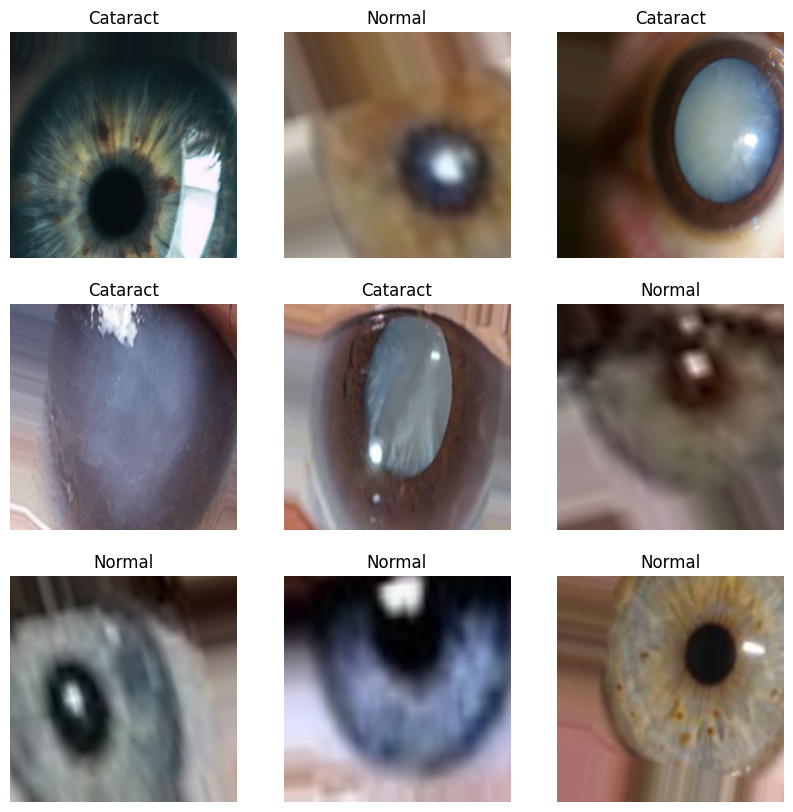

In [22]:
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the train_generator
sample_images, sample_labels = next(train_generator)

# Get the class indices from the train_generator
class_indices = train_generator.class_indices

# Reverse the dictionary to map indices to class names
class_names = {v: k for k, v in class_indices.items()}

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    # Map label index to class name
    label_index = sample_labels[i]
    class_name = class_names[int(label_index)]
    plt.title(class_name)  # Use class name instead of "Normal" or "Cataract"
    plt.axis("off")
plt.show()

In [25]:
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)



In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [27]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/5


C:\Users\masub\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 403s 12s/step - accuracy: 0.7593 - loss: 0.7723 - val_accuracy: 0.4959 - val_loss: 3.2221
Epoch 2/5


C:\Users\masub\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 702ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 164s 10s/step - accuracy: 0.8915 - loss: 0.1986 - val_accuracy: 0.4959 - val_loss: 18.8969
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 180s 11s/step - accuracy: 0.9525 - loss: 0.1364 - val_accuracy: 0.4959 - val_loss: 47.1347


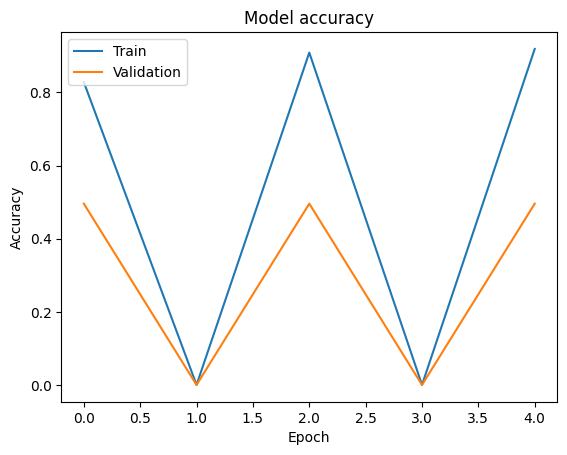

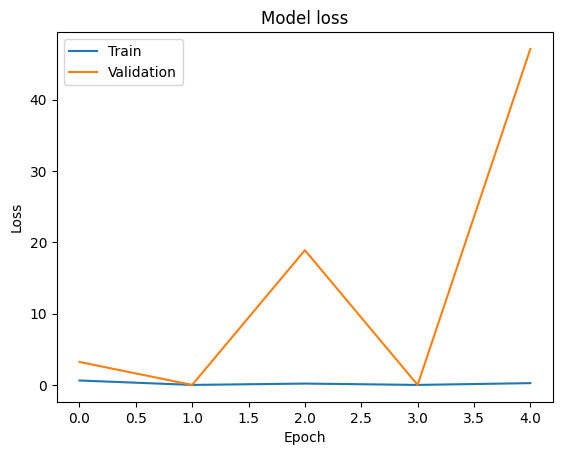

In [28]:
# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess an image
img_path = '../data/myimage/image_1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

# Predict
prediction = model.predict(x)

# Visualize result
if prediction < 0.5:
    print("The image is predicted to be normal.")
else:
    print("The image is predicted to have cataract.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 158s 158s/step
The image is predicted to have cataract.
